Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины X∼N(μ,σ2) лежит в интервале μ±c⋅σ. Чему равно точное значение константы c? Округлите ответ до четырёх знаков после десятичной точки.

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

Из функции распределения следует, что оставшиеся 0.3% вероятностно массы находятся в правом и левом хвостах графика, по 0.15% в каждом соответственно

[]

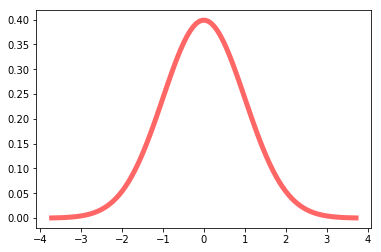

In [12]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

Определение параметра С при помощи вызова обратной функции распределения вероятностей.

In [75]:
c = norm.ppf(1-0.0015)
"%.4f" % c

'2.9677'

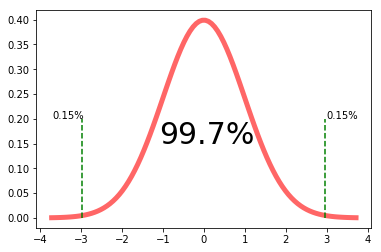

In [78]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot([c, c], [0, 0.2],'g--')
ax.plot([-c, -c], [0, 0.2],'g--')
ax.text(3, 0.2, '0.15%', fontsize=10);
ax.text(-3.7, 0.2, '0.15%', fontsize=10);
ax.text(-1.1, 0.15, '99.7%', fontsize=30);

Выберите все распределения с несимметричной функцией плотности

In [79]:
from scipy.stats import f, t, chi2

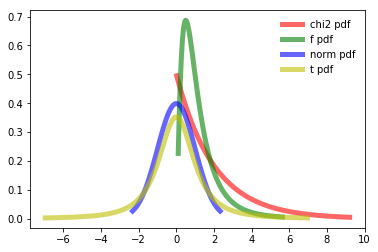

In [102]:
df=2
dfn, dfd = 5, 10

fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf')

x1 = np.linspace(f.ppf(0.01, dfn, dfd),
                 f.ppf(0.99, dfn, dfd), 100)
ax.plot(x1, f.pdf(x1, dfn, dfd),
       'g-', lw=5, alpha=0.6, label='f pdf')

x2 = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x2, norm.pdf(x2), 'b-', lw=5, alpha=0.6, label='norm pdf')

x3 = np.linspace(t.ppf(0.01, df),
                 t.ppf(0.99, df), 100)
ax.plot(x3, t.pdf(x3, df),
        'y-', lw=5, alpha=0.6, label='t pdf')

ax.legend(loc='best', frameon=False)

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.


In [104]:
count_asp, inf_asp = 11037, 104
count_pl, inf_pl = 11034, 189

In [105]:
p_inf_asp = inf_asp/count_asp
p_inf_pl = inf_pl/count_pl

In [109]:
'%.4f' % (p_inf_pl - p_inf_asp)

'0.0077'

Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

Найдём правую границу доверительного интервала для разности долей независимых выборок

In [113]:
z = norm.ppf(1 - .05 / 2.)
right_boundary = (p_inf_pl - p_inf_asp) + z * np.sqrt(p_inf_pl * (1 - p_inf_pl)/ count_pl
                                                    + p_inf_asp * (1 - p_inf_asp)/count_asp)

In [115]:
'%.4f' % right_boundary

'0.0107'

Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину $$\frac{p}{1-p} 
$$

, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо p нужно подставить p^. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

$$\frac{\frac{189}{11034}}{1-\frac{189}{11034}} = \frac{189}{11034-189}\approx 0.0174 
1− 
11034
189
​	 
11034
189
​	 
​	 = 
11034−189
189
​	 ≈0.0174$$

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [119]:
odd_pl = inf_pl/(count_pl - inf_pl)
odd_asp = inf_asp/(count_asp - inf_asp)

In [122]:
odd_pl, odd_asp

(0.017427385892116183, 0.009512485136741973)

In [190]:
'%.4f' % (odd_pl/odd_asp)

'1.8321'

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
установите random seed=0;
сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [185]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def get_odds(sample):
    inf = sample[sample==1]
    return len(inf) / len(sample) / (1 - len(inf) / len(sample))


In [186]:
asp_sample = np.hstack((np.ones(asp_inf), np.zeros(count_asp - asp_inf)))
pl_sample = np.hstack((np.ones(pl_inf), np.zeros(count_pl - pl_inf)))

In [187]:
asp_sample.shape[0], asp_sample[asp_sample==1].shape[0], \
pl_sample.shape[0], pl_sample[pl_sample==1].shape[0]

(11037, 104, 11034, 189)

In [188]:
np.random.seed(0)

asp_odds = list(map(get_odds, get_bootstrap_samples(asp_sample, 1000)))
pl_odds = list(map(get_odds, get_bootstrap_samples(pl_sample, 1000)))

print("95% confidence interval for the aspirin sample odds:",  stat_intervals(asp_odds, 0.05))
print("95% confidence interval for the placebo sample odds:",  stat_intervals(pl_odds, 0.05))

95% confidence interval for the aspirin sample odds: [ 0.00757714  0.0113626 ]
95% confidence interval for the placebo sample odds: [ 0.01499402  0.01996672]


In [189]:
delta_odds = list(map(lambda x: x[1] / x[0], zip(asp_odds, pl_odds)))
print("95% confidence interval for the difference odds",  stat_intervals(delta_odds, 0.05))

95% confidence interval for the difference odds [ 1.44419465  2.34321168]


In [155]:
(1.43730175 + 2.31829057)/2

1.87779616

In [192]:
'%.4f' % stat_intervals(delta_odds, 0.05)[0]

'1.4442'

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [195]:
from scipy.stats import binom_test

In [196]:
'%.4f' % binom_test(67, 100, 0.75)

'0.0822'

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.



In [197]:
import pandas as pd
from scipy.stats import binned_statistic_2d

In [198]:
sosny = pd.read_csv('pines.txt', sep='\t')

In [199]:
X = sosny['sn'].values
Y = sosny['we'].values
bin_x = np.linspace(sosny.min()[0], sosny.max()[0], 6)
bin_y = np.linspace(sosny.min()[1], sosny.max()[1], 6)

In [201]:
S = binned_statistic_2d(X, Y, None, statistic  = 'count', bins=[bin_x,bin_y])

In [202]:
S.statistic

array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]])

In [203]:
sosny.shape[0]/25

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [206]:
from scipy.stats import chisquare

In [207]:
Z = chisquare(S.statistic.reshape(25,), ddof = 0)

In [210]:
'%.2f' % Z[0]

'150.59'

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с 25-1=2425−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K-1K−1, где KK — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [214]:
chi2.sf(Z, 24)[0]

2.5746697749672791e-20